In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
trees = pd.read_csv("datasets/trees.csv")

In [5]:
import statsmodels.api as sm
X = sm.add_constant(trees[["Girth"]])
y = trees["Volume"]
model = sm.OLS(y,X).fit()  #Fitting a regression model 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     419.4
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           8.64e-19
Time:                        10:41:55   Log-Likelihood:                -87.822
No. Observations:                  31   AIC:                             179.6
Df Residuals:                      29   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9435      3.365    -10.978      0.000     -43.826     -30.061
Girth          5.0659      0.247     20.478      0.000       4.560       5.572
==============================================================================
Omnibus:                        0.169   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.382
Skew:                           0.028   Prob(JB):                        0.826
Kurtosis:                       2.459   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
predictions = model.predict(X)

Text(0, 0.5, 'Volume of trees(cubic ft.)')

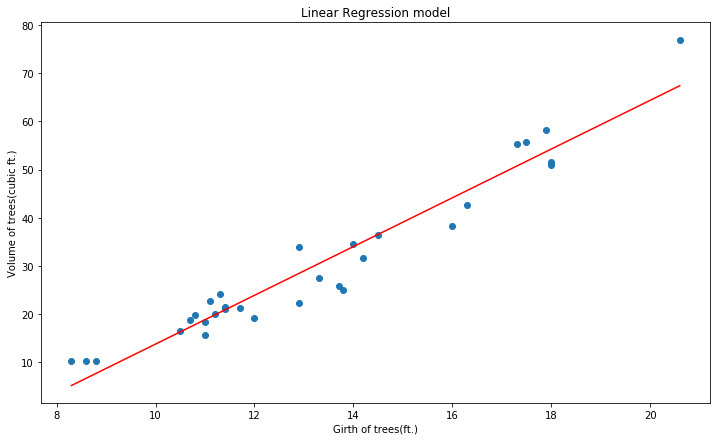

In [8]:
plt.figure(figsize=(12,7))
plt.scatter(x= "Girth", y="Volume", data = trees)
plt.plot(trees.Girth, predictions, 'r')
plt.title("Linear Regression model")
plt.xlabel("Girth of trees(ft.)")
plt.ylabel("Volume of trees(cubic ft.)")

#### using Girth + Girth**2

In [9]:
import statsmodels.formula.api as smf
trees_polynomial_model_2 = smf.ols(formula='Volume ~ Girth + I(Girth**2)', data=trees).fit()

In [12]:
trees_polynomial_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     350.5
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           1.52e-20
Time:                        10:44:39   Log-Likelihood:                -79.746
No. Observations:                  31   AIC:                             165.5
Df Residuals:                      28   BIC:                             169.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.7863     11.223      0.961      0.345     -12.203      33.775
Girth            -2.0921      1.647     -1.270      0.215      -5.467       1.282
I(Girth ** 2)     0.2545      0.058      4.376      0.000       0.135       0.374
==============================================================================
Omnibus:                        0.529   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.653
Skew:                           0.220   Prob(JB):                        0.722
Kurtosis:                       2.442   Cond. No.                     3.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### using Girth**2

In [11]:
import statsmodels.formula.api as smf
trees_polynomial_model_2_A = smf.ols(formula='Volume ~ I(Girth ** 2)', data=trees).fit()

In [14]:
trees_polynomial_model_2_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     684.8
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           1.01e-21
Time:                        10:45:27   Log-Likelihood:                -80.614
No. Observations:                  31   AIC:                             165.2
Df Residuals:                      29   BIC:                             168.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.3551      1.417     -2.368      0.025      -6.253      -0.457
I(Girth ** 2)     0.1812      0.007     26.169      0.000       0.167       0.195
==============================================================================
Omnibus:                        0.830   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.756
Skew:                          -0.056   Prob(JB):                        0.685
Kurtosis:                       2.243   Cond. No.                         479.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Visualizing the Obtained Non-Linear Regression Model

In [15]:
predictions = trees_polynomial_model_2.predict(trees.Girth)

Text(0, 0.5, 'Volume of trees(cubic ft.)')

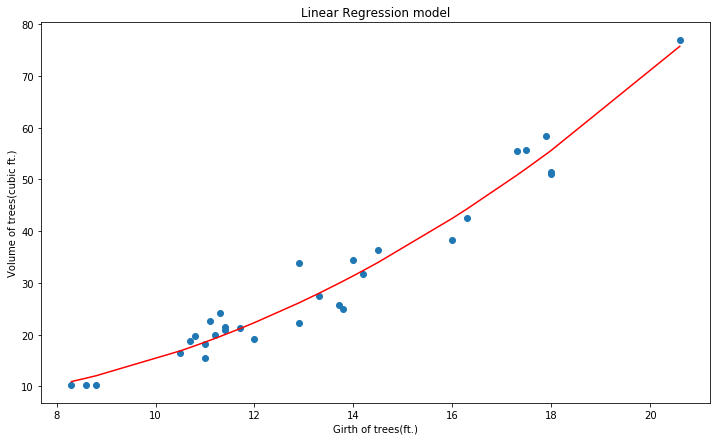

In [16]:
plt.figure(figsize=(12,7))
plt.scatter(x= "Girth", y="Volume", data = trees)
plt.plot(trees.Girth, predictions, 'r')
plt.title("Linear Regression model")
plt.xlabel("Girth of trees(ft.)")
plt.ylabel("Volume of trees(cubic ft.)")